$$
		\begin{bmatrix}
			\dot{q} \\
			\dot{p} \\
			\dot{S}_1 \\
			\dot{S}_2
		\end{bmatrix}
		\: = \:
		\begin{bmatrix}
			0 && 1 && 0 && 0 \\
			-1 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
		\end{bmatrix}
		\,
		\begin{bmatrix}
			\left(p_2 - p_1\right) A \\
			v \\
			T_1 \\
			T_2
		\end{bmatrix}
		\: + \:
		\begin{bmatrix}
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && \alpha \, \frac{T_2}{T_1} && -\alpha \\
			0 && 0 && -\alpha && \alpha \, \frac{T_1}{T_2}
		\end{bmatrix}
		\,
		\begin{bmatrix}
			0 \\ 0 \\ 1 \\ 1
		\end{bmatrix}
$$

In [72]:
import sympy
sympy.init_printing()
T_1 = sympy.Symbol('T_1', positive = True, real = True)
T_2 = sympy.Symbol('T_2', positive = True, real = True)
p_1 = sympy.Symbol('p_1', positive = True, real = True)
p_2 = sympy.Symbol('p_2', positive = True, real = True)
A = sympy.Symbol('A', positive = True, real = True)
v = sympy.Symbol('v')
T_0 = sympy.Symbol('T_0', positive = True, real = True)
α = sympy.Symbol('α', positive = True, real = True)

In [74]:
dE = sympy.Matrix([
    [(p_2 - p_1) * A],
    [v],
    [T_1],
    [T_2]
])

In [75]:
dS = sympy.Matrix([
    [0],
    [0],
    [1],
    [1]
])

In [73]:
J = sympy.Matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [76]:
R = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, α * T_2 / T_1, -α],
    [0, 0, -α, α * T_1 / T_2]
])

In [100]:
J @ dS

In [101]:
R @ dE

In [116]:
(J @ dE + R @ dS).applyfunc(sympy.simplify)

⎡     v      ⎤
⎢            ⎥
⎢A⋅(p₁ - p₂) ⎥
⎢            ⎥
⎢α⋅(-T₁ + T₂)⎥
⎢────────────⎥
⎢     T₁     ⎥
⎢            ⎥
⎢α⋅(T₁ - T₂) ⎥
⎢─────────── ⎥
⎣     T₂     ⎦

In [129]:
D = sympy.diag(0, 0, α / T_0, α / T_0)

In [144]:
C = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, -sympy.sqrt(T_2 / T_1), 0],
    [0, 0, +sympy.sqrt(T_1 / T_2), 0]
])

In [146]:
C = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, +sympy.sqrt(T_2 / T_1)],
    [0, 0, 0, -sympy.sqrt(T_1 / T_2)]
])

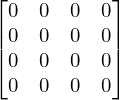

In [131]:
(C @ D @ C.T - 1 / T_0 * R).applyfunc(sympy.simplify)

In [147]:
C.T @ dE

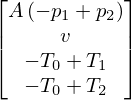

In [148]:
dH = dE - T_0 * dS
dH

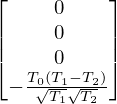

In [158]:
Force = (- C.T @ dH).applyfunc(sympy.simplify)
Force

In [161]:
Flux = D @ Force
Flux

⎡      0      ⎤
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢-α⋅(T₁ - T₂) ⎥
⎢─────────────⎥
⎢  ____   ____⎥
⎣╲╱ T₁ ⋅╲╱ T₂ ⎦

In [162]:
(C @ Flux).applyfunc(sympy.simplify)

⎡     0     ⎤
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢      T₂⋅α ⎥
⎢ -α + ──── ⎥
⎢       T₁  ⎥
⎢           ⎥
⎢α⋅(T₁ - T₂)⎥
⎢───────────⎥
⎣     T₂    ⎦

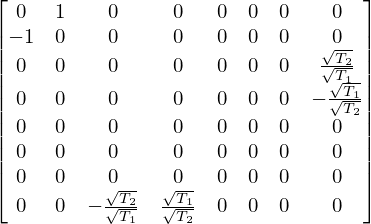

In [170]:
sympy.Matrix(sympy.BlockMatrix([
    [J, C],
    [-C.T, sympy.zeros(4,4)]
]))

$$
\begin{bmatrix}
    \dot{x} \\
    \delta
\end{bmatrix}
\: = \:
\begin{bmatrix}
    J && C(\frac{\partial H}{\partial x}) \\
    -C^\mathrm{T}(\frac{\partial H}{\partial x}) && 0
\end{bmatrix}
\,
\begin{bmatrix}
    \frac{\partial H}{\partial x} \\
    \phi
\end{bmatrix}
$$

$$
\phi \: = \: D \, \delta
$$